Exploration SO3의 첫번째 노드를 공부했다.
첫번째 프로젝트를 제출해야 하는데, 잘 되지 않았다.
저녁을 먹고 잠깐 공원에 나가 산책을 하다가, 핸드폰으로 recall과 precision에 대해 찾아보았는데, 그러다보니, 답이 조금 보이는 것 같았다.
(라고 생각했는데, 돌아서서 생각하니 답을 완전히 알게 되지는 않았다.) 그래도 조금 더 알게 되었다.

[이 글](https://koopingshung.com/blog/machine-learning-model-selection-accuracy-precision-recall-f1/amp/)과 [다른 글](https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2)의 글을 읽었는데 좀 정리해야 할 것 같아서 여기에 쓴다.
이후에 [그 다음 글](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1)도 읽었다.
다른 글과 그 다음글은 서로 이어지는 내용으로, [마지막 글](https://towardsdatascience.com/multi-class-metrics-made-simple-the-kappa-score-aka-cohens-kappa-coefficient-bdea137af09c)에서 그 내용이 끝난다.

더 참고하려고 하지는 않았는데, [또 좋은 글](https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd)과 [또 다른 글](https://towardsdatascience.com/cohens-kappa-9786ceceab58)이 있어서 첨부한다.

목차

1. binary metrics
  
  1.1. confusion matrix
  
  1.2. accuracy
  
  1.3. precision
  
  1.4. recall
  
  1.5. F1 score
  
  1.6. binary metric 선택하기


2. multiclass metrics
  
  2.1. accuracy
  
  2.2. macro metrics
  
  2.3. weighted-F1
  
  2.4. Cohen's kappa
  
  
3. codes with `sklearn`

# 1. Binary Metrics

먼저 낮에 찾은 위키피디아 그림자료이다.

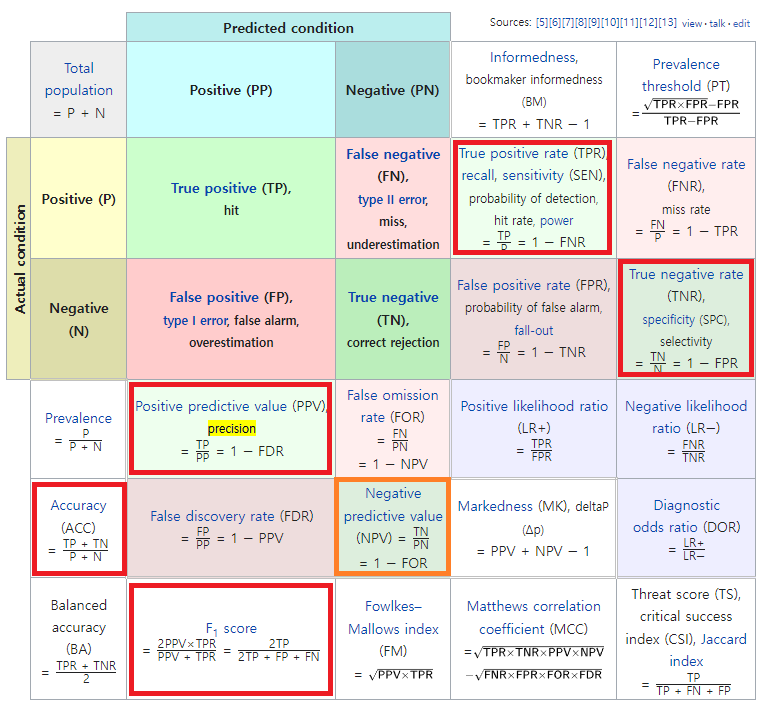

LMS에 적혀있는 다섯 개의 metric은 빨간색으로 표시되어 있는데, 내 생각에는 '균형을 맞추기 위해서'는 주황색의 저 metric도 표시해야 할 것 같아서 표시했다.

## 1.1. confusion matrix

confusion matrix를 적을 때, 가로축과 세로축 중 어떤 걸 predicted class로 놓고, 어떤 걸 actual class로 놓을 지 하는 건 늘 고민이다.
위의 글들만 해도 서로 다르게 적고 있다.
하지만, 나는 LMS에 나온대로 표현하겠다.
아래는 LMS의 그림이다.

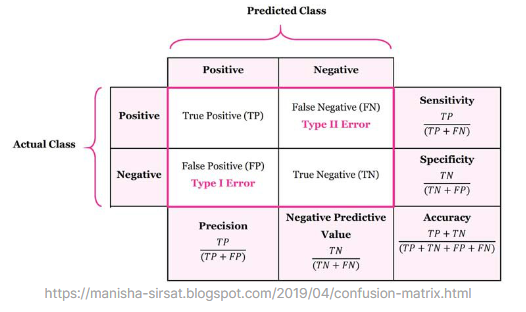

confusion matrix와 metrics라는 주제는 비단 머신러닝에 한정하여 말하게 되는 주제는 아니다.
나는 통계학을 배운 적이 없어서 잘은 모르지만, 그래도 통계학에서 예전부터 기본적으로 사용되던 용어라고 알고 있다.
통계학에서는 어떤 labeled 데이터들이 주어져있을 때, 그 데이터를 가장 잘 표현할 수 있는 모델이 어떤 모델인지를 고민한다.
만약 label들이 범주형 자료(categorical data)라면, 분류(classification) 문제를 고려하는 것이고, confusion matrix를 항상 생각할 수 있다.
특히, 이진분류(binary classification) 문제라면, $2\times2$ confusion matrix를 생각하게 된다.

confusion matrix(오차행렬)와 그 예측 결과(four cells)에 대하여 물어보는 질문에 나는 이렇게 썼다.

>**Q15. 오차 행렬에서는 예측 결과를 네 가지로 구분합니다. 각각은 무엇인가요?**
>
>confusion matrix에서는 두 개의 클래스 (그렇다, 아니다) / (양성이다, 음성이다) / (Positive, Negative) / (스팸메일이다, 아니다)를 상정해놓고 시작합니다.
실제 데이터의 값이 어느 클래스에 속하는지(Positive, Negative)와 예측결과가 어느 클래스에 속하는지(Positive, Negative)에 따라서 전체 데이터는 네 가지로 나뉩니다.
이때, 실제 데이터의 값이 예측결과와 같은 클래스에 속하면 참(True)이고 다른 클래스에 속하면 거짓(False)로 이름붙입니다.
>
>아래에서 각각의 네 경우에 대하여 세 개의 문자는 각각 - 실제(positive, negative) / 예측(positive, negative) / 진위(true, false)를 나타내겠습니다.
>1. True Positive : P / P / T,
>2. False Negative : P / N / F,
>3. True Negative : N / N / T,
>4. False Positive : N / P / F
>
>예를 들어, False Nagative에서 뒤의 Nagative는 예측값을 Nagative로 예측했다는 것이고, 앞의 False는 실제값과 예측값이 다르다는 것입니다. 따라서 실제값은 Positive 입니다.

이 주제에 관해서는 지금까지 한 3-4번째 공부하는 것 같은데, 매번 배울때마다 헷갈렸다. 이제는 헷갈리지 않을 때가 되었다.
위처럼 정리해놓고 나니 그래도 좀 낫다.
특히 array 형태로 적어놓은 것이 기억에 잘 남는다.
이것을 다시 표로 쓰면

|cell           |actual|predicted|T/F|
|:-:|:-:|:-:|:-:|
|True Positive  |P     |P        |T|
|False Negative |P     |N        |F|
|True Positive  |N     |P        |F|
|False Negative |N     |N        |T|

이다.
써놓고 보니 또 헷갈리는 것 같은데 기분탓이다.
하지만, 정신을 차리고 보면 False Negative에서 뒤에 붙는 Negative는 predicted negative를 뜻한다.
False는 actual과 predicted가 일치하지 않는다는 뜻이니, actual positive가 된다.
이렇게 한 번 생각해놓으니, 시간은 좀 걸려도 헷갈리지는 않게 되었다.

여기서부터는 [이 글](https://koopingshung.com/blog/machine-learning-model-selection-accuracy-precision-recall-f1/amp/)을 따라가겠다.

## 1.2. accuracy

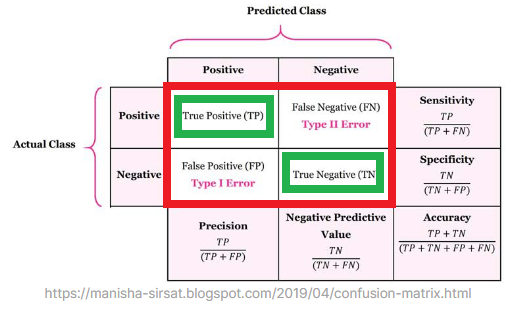

$$\text{accuracy} = \frac{\text{TP}+\text{TF}}{\text{TP}+\text{FN}+\text{FP}+\text{FN}}$$

가장 기본적으로 생각할 수 있는 metric은 accuracy이다.
전체 경우의 수에서 True인 경우의 수를 구했다.

이러한 accuracy가 제 역할을 하지 못하는 경우는 다음의 예이다.
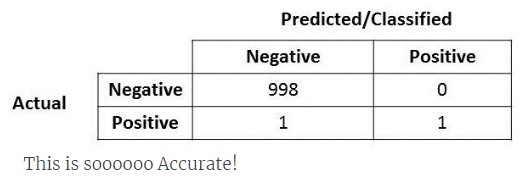

accuracy를 계산하면 무려 0.999가 되는데, 그렇다고 해서 이 모델이 우수하다고는 말하기 힘들다.
원 출처인 [이 글](https://koopingshung.com/blog/machine-learning-model-selection-accuracy-precision-recall-f1/amp/)에서는 이것을 바이러스 등과 연관지어서 이야기하고 있다.
글자 그대로 인용하겠다.

>But….(well you know this is coming right?) what if I mentioned that the positive over here is actually someone who is sick and carrying a virus that can spread very quickly? Or the positive here represent a fraud case? Or the positive here represents terrorist that the model says its a non-terrorist? Well you get the idea. The costs of having a mis-classified actual positive (or false negative) is very high here in these three circumstances that I posed.

설명하자면, 이 모델은 실제 negative인 경우에 대하여 제대로 맞춘 비율이 50%밖에 안된다는 것이다.
여기서의 positive가 코로나 바이러스의 양성이라든지, '이 사람이 사기꾼이다'라는 말이라든지, '이 사람이 테러리스트이다'라고 한다면, 이것은 절대 좋은 모델이 아니다.
코로나 양성인 사람을 양성으로 판별할 수 없고, 사기꾼을 사기꾼이라고 판별할 수 없으며, 테러리스트를 테러리스트라고 판별할 수 없다.

나중에 recall을 설명하면서 이 두 사례와 비슷한 사례를 말해야 할 것이다.

## 1.3. precision

recall과 precision 중 precision을 먼저 놓는 이유는, 원 출처인 [이 글](https://koopingshung.com/blog/machine-learning-model-selection-accuracy-precision-recall-f1/amp/)의 글의 순서가 그렇기 때문이기도 하지만, 조금 다른 이유가 있다.
이제는 정말로 recall과 precision의 정의를 확실히 외우겠다고 생각했기 때문이다.
그런데 precision이 더 외우기가 쉽다.
그래서 먼저 앞에 놓았다.

어떻게 외우면 되느냐 하면,

 - precision - predicted positive - False Positive
 
로 외우면 된다.
즉, precision은 predicted positive에서의 TN을 계산하는 값이다.
그리고 이것은 false positive와 깊은 관련이 있다.
외우긴 했지만, 그래도 그림은 그려놔야겠고 식은 적어놓아야겠지.

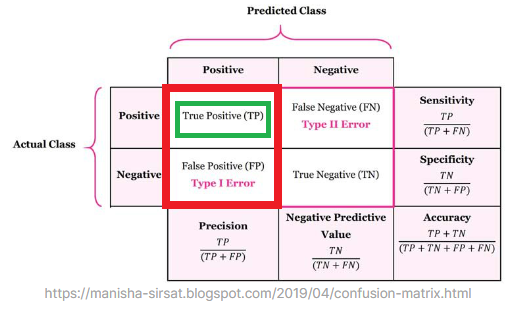

$$\text{precision} = \frac{TP}{TP+FP}$$

위 그림에서 False Positive에 주목할 필요가 있다.
precision을 특징 짓는 건 바로 FP이다.
특히 [이 글](https://koopingshung.com/blog/machine-learning-model-selection-accuracy-precision-recall-f1/amp/)에서는 FP의 오류를 범했을 때, 상당한 손실을 볼 수 있다면, precision을 반드시 고려해야 한다고 한다.
대표적인 예는 email spam detection이다.

> Precision is a good measure to select the "best" model, when the costs of False Positive is high. For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.

email spam detection에서 FP인 경우는, 실제로는 스팸이 아닌데(actual negative) 스팸메일로 분류하는 경우(predicted positive)이다.
정말로, 이런 일은 있어서는 안된다.
받아야 하는 중요한 메일인데 스팸메일로 분류해버리면 안되는 것이다.

[다른 글](https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2) 에서 제시하는 예는 video recommendation이다.
조금 더 정확하게는, 정말 내 취향에 맞는 비디오들만 추천했으면 좋겠다, 하는 경우에 이 precision을 쓰는 것이다.
그러니까, 실제로는 내가 좋아하는 취향의 비디오가 아닌데(actual negative) 추천해주는(predicted positive) 경우가 없었으면 좋겠다.
다시 말해, 나에게 정확하게(precisely) 추천해주었으면 좋겠다는 것이다.
아마 여기에서 이 단어 precision이 나오지 않았을까.

>Take another example — say you are building a video recommendation system, and your classifier predicts Positive for a relevant video and Negative for non-relevant video. You want to make sure that almost all of the recommended videos are relevant to the user, so you want high precision.

## 1.4. recall

recall은 precision과 반대이다.
precision이 외우기 쉬웠던 것과 반대로 이건 외우기가 어렵다.
그러니까 precision만 외워놓고, recall은 그 나머지라고 생각하는 수밖에 없겠다.
그것이 아니라면, recall actually로 외워야 할까? 그런데 저 말은 말이 안된다.
 - recall - actual positive - False Negative
 
여하튼, recall이란, actual positive 중에서 TP를 계산하는 값이다.
precision때와는 정 반대로, 여기서는 False Negative가 큰 의미를 가진다.
그림을 그리고 식을 쓰면 다음과 같다.

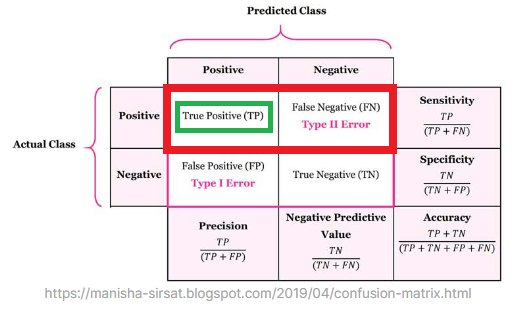

$$\text{recall} = \frac{TP}{TP+FN}$$

recall에서 중요한 것은 단연 FN이다.
recall은 어느 때 쓰냐하면, False Negative를 고려해야 할 때 사용한다.
[이 글](https://koopingshung.com/blog/machine-learning-model-selection-accuracy-precision-recall-f1/amp/)에서는 recall을 사용해야 하는 예시로서 부정거래를 적발하는 문제(fraud detection)와 환자를 판정하는 문제(sick patient detection)를 이야기하고 있다.

> For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.

여기에서 FN은, 실제로는 부정거래를 하고 있는데(actual positive) 그것을 부정거래라고 적발하지 못하는(predicted negative) 경우이다.
이런 경우는 있어서는 안되고 있다고 해도 최대한 없어야 한다.

>Similarly, in sick patient detection. If a sick patient (Actual Positive) goes through the test and predicted as not sick (Predicted Negative). The cost associated with False Negative will be extremely high if the sickness is contagious.

[다른 글](https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2)에서도 환자 예시를 들고 있다.

>Imagine, for example, that your classifier needs to detect diabetes in human patients. “Positive” means the patient has diabetes. “Negative” means that the patient is healthy. (I know, it’s confusing. But that’s medical lingo!). In this case, you probably want to make sure that your classifier has high recall, so that as many diabetics as possible are correctly detected.

sick patient detection에서 FN도 마찬가지이다.
실제로는 병이 있는데(actual positive) 병이 있다고 진단하지 못하는 (predicted negative) 경우이다.
만약, 이 병이 암처럼 심각한 병이라면, FN을 놓쳤을 때에 큰일날 수 있다.
recall에는 '상기하다', '회고하다'라는 뜻밖에 없긴 하지만, 상기하거나 회고하다보면 그 일을 걱정할 수밖에 없을 것이다.
암이 발병하거나 부정거래가 발생하는 것을 걱정한다는 의미로 recall을 사용한 것이 아닐까?
그것이 아니라면 어쩔 수 없지만, 아무튼 나는 머릿속에 이렇게 각인해놓으려고 한다.

그런데 생각해보면, recall을 사용하느냐, precision을 사용하느냐 하는 문제에는 어떤 preference라는 것이 없다.
다시 말해서, sick patient detection 문제에서 병을 진단하는 데 성공하는 것을 negative로 놓고, 병을 진단하는 데 실패하는 것을 positive로 놓으면 (암세포 입장에서는  그럴 것이다.) recall이 아닌 precision을 사용해야 한다.
이 말을 또 다시 말하면, recall과 precision이 정확히 반대의 역할을 한다고도 말할 수 있겠다.

위의 예시들을 통해서 보면, (아무리 preference라는 게 없다고 하더라도) 직관적으로 precision과 recall은 다음과 같은 의미라고 생각하면 될 것 같다.
 - precision : 어떤 정확한 작업을 하고 싶을 때, 사용한다.
     - 유튜브 알고리즘이 내 취향에 맞는 비디오만 추천해줬으면 좋겠다.
     - 스팸필터가 스팸메일만 정확하게 구분했으며 좋겠다. (중요한 메일이 스팸메일함에 가지 않았으면 좋겠다.)
 - recall : 잘못될 수 있는 일을 방지하고 싶을 때, 보수적으로 행동하기 위해 사용한다.
     - 전염병이 있는데도 전염병이 없는 것으로 진단하지 말았으면 좋겠다.
     - 부정거래가 있는데도 부정거래가 없는 것으로 판단하지 않았으면 좋겠다.

## 1.5. F1 score

F1 score를 이야기할 때 흔히 이야기하는 것은 precision과 recall 모두를 높게 만들기는 어려우니 일종의 trade-off를 할 수밖에 없다는 것이다.
[다른 글](https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2)에 보면

> Life is full of trade-offs, and that’s also true of classifiers. There’s usually a trade-off between good precision and good recall. You usually can’t have both.

와 같이 적혀있고, [그 다음 글](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1)에는

> In general, we prefer classifiers with higher precision and recall scores. However, there is a trade-off between precision and recall: when tuning a classifier, improving the precision score often results in lowering the recall score and vice versa — there is no free lunch.

라고 적혀있다.
나는 이것이 잘 이해가 가지 않았다.
"두 값 모두 높은 경우도 있을텐데?"하고 생각했다.

다시 생각해보면, precision에 영향을 주는 것은 False Positive이고, recall에 영향을 주는 것은 False Negative이다.
조금 더 정확히 말하면, FP가 상대적으로 적을 때 precision이 높고, FN이 상대적으로 적을 때, recall이 높다.
그러니까 위의 말은, FP와 FN이 동시에 적기는 힘들다는 말이다.

첫번째 인용문에는 자세히 나와있지 않지만, 이어지는 다음 인용문에는 더 구체적으로 잘 설명되어 있다.
"when tuning a classifier"라는 말에 주목해야 할 것 같다.
나는 아까 "두 값 모두 높은 경우도 있을텐데?"라고 생각했었지만, 그런 경우는 말할 필요가 없다. accuracy가 100%일 경우는 고민할 필요가 없는 것이다.
일반적인 경우, 그러니까 accuracy가 50 ~ 80%에 분포되어 있는 경우를 가정하고 말하고 있는 것이다.
accuracy를 높이기 위해 hyperparameter tunning도 하고, 모델을 이것저것 바꿔보고 할 것인데 그럴 때에, FP를 줄이는 쪽으로 tunning을 하게 되면 FN이 올라가고, FN을 줄이는 쪽으로 tunning을 하게 되면 FP가 올라간다는 것이다.

이것은 마치, 확률론에서(확률론까지도 아니고 그냥 고등학교에서 배우는 확률 개념에서) 두 사건 $A$, $B$를 고려하는 것과도 비슷해보인다.
$P(A)$를 actual positive에 $P(B)$를 predicted positive에 대응시키면 $P(A-B)$와 $P(B-A)$를 동시에 줄이기는 쉽지 않을 것이다.
특히 $A$와 $B$가 독립이면, 두 값을 동시에 줄이는 방향은 상당히 극단적인 모양이 될 수밖에 없고, 그건 우리가 원하는 방향이 아니다.
이러한 모델 설정에서 원하는 것은 actual positive와 predicted positive가 서로 종속적이어야 한다는, 그러니까 상관계수가 1에 가까워야 한다는 것이겠지만, 가정상 accuracy가 50 ~ 80 % 이므로 상관계수가 1이라고 볼 수 없다.
독립은 아니더라도 완전히 종속이 아니기 때문에, 두 값을 동시에 줄일 수 없다.
(이렇게 생각해도 될까? 정확한 말은 아닌데, 그냥 대충 맞을 것 같아서 적어보았다.)

precision과 recall이 서로 배타적인 관계에 있다는 점을 차치하고라도, F1score는 다른 점에서 중요하다.
어떤 문제에서는 precision을 무시할 수 없고, 어떤 문제에서는 recall을 무시할 수 없으니, 일반적으로 둘 다 무시해서는 안될 것이다.
따라서 precision과 recall의 적당한 평균을 잡아서 하나의 metric으로 활용하는 것이다.
그런데 어떤 평균을 사용하냐 하면, 조화평균을 사용한다.

$$\text{F1-score} = \frac{2\text{(precision)}\text{(recall)}}{\text{(precision)}+\text{(recall)}}$$

왜 굳이 조화평균을 사용하는지에 대해서는 [그 다음 글](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1)에 다음과 같은 설명이 있다.

>Similar to arithmetic mean, the F1-score will always be somewhere in between precision and recall. But it behaves differently: the F1-score gives a larger weight to lower numbers. For example, when Precision is 100% and Recall is 0%, the F1-score will be 0%, not 50%. Or for example, say that Classifier A has precision=recall=80%, and Classifier B has precision=60%, recall=100%. Arithmetically, the mean of the precision and recall is the same for both models. But when we use F1’s harmonic mean formula, the score for Classifier A will be 80%, and for Classifier B it will be only 75%. Model B’s low precision score pulled down its F1-score.



즉, 두 값의 산술평균과 조화평균을 고려할 때, 조화평균이 조금 더 작다.
예를 들어 2과 6의 산술평균은

$$\frac{2+6}2=4$$

이지만, 2과 6의 조화평균 $h$는

$$\frac1h=\frac{\frac12+\frac16}2$$

을 만족시키는 값이므로 $h=3$이다.
인용된 부분에서는, classifier A가 precision=recall=80%을 만족하고, classfier B가 precision=100, recall=60을 만족하는 예에 대해 말하고 있다.
단순히 산술평균으로 계산하면 A와 B의 평균이 같지만(=80%), 조화평균으로 계산하면 A의 평균(=80%)에 비해 B의 평균(=75%)이 더 작은 것이다.

이것은 합리적으로 보인다.
우리는 precision과 recall을 동시에 줄이기를 원하지 한쪽만 작고 한쪽은 크길 원하지 않는다.
그러니까 한쪽만 작고 한쪽은 큰 B의 경우를 더 안좋게 평가하는 것이 바람직하다.
하지만, 그럼에도 굳이 왜 조화평균을 사용하는 지가 완전히 설명되지는 않는다.
가령 기하평균도 산술평균보다는 작거나 같다.

내가 생각할 때는, 다음과 같은 이유때문이지 않을까 한다.
아까 적기를, precision과 recall에서 중요한 것이 각각 FP와 FN이라고 했었다.
그리고 precision과 recall의 정의가

$$\text{precision} = \frac{TP}{TP+FP},\quad\text{recall} = \frac{TP}{TP+FN}$$

였었다.
중요한 것은 TP가 아니라 FP와 FN이므로 precision과 recall보다는 이것들의 역수인

$$\frac1{\text{precision}} = \frac{TP+FP}{TP},\quad
\frac1{\text{recall}} = \frac{TP+FN}{TP}$$
가 중요하다.
그리고 이 역수들의 평균을 내는 것이, 원래 값들의 평균을 내는 것보다 중요한 것이다.
그러니까 precision과 recall의 핵심인 FP와 FN의 의미를 살려서 평균을 내려면, precision과 recall을 산술평균하는 것이 아니라, 조화평균하는 것이 맞다고 보여진다.

## 1.6. metric 선택하기

[이 글](https://koopingshung.com/blog/machine-learning-model-selection-accuracy-precision-recall-f1/amp/)의 마지막에는 어떤 metric을 선택해야 할 지에 대해 나름대로 체계적으로 설명하고 있다.
이것이 이번 프로젝트에 대한 답의 일부가 될 수 있을 것 같아서 일단 인용해보았다.

> **How to Choose Which Metrics?**
>
> Ok here is a set of questions you need to ask yourself, to decide the model selection metrics.
>
> **First Question**: Does both True Positive and True Negatives matters to the business or just True Positives? If both is important, Accuracy is what you go for.
>
> **Second Question**: After establishing that True Positive is what you are concerned with more, ask yourself, which one has a higher costs to business, False Positives or False Negatives?
>
> If having large number of False Negatives has a higher cost to business, choose Recall.
>
> If having large number of False Positives has a higher cost to business, choose Precision.
>
> If you cannot decide or thinks that its best to reduce both, False Negatives and False Positives then choose F1.
>
> Hope the above two questions will simplify which metrics to choose.



이번 첫번째 프로젝트에서 metric을 선택해야 하는 세 개의 dataset은 다음과 같다.
1. `digits` dataset
2. `wine` dataset
3. `breast_cancer` dataset
 
답을 내기 가장 쉬운 것은 3번이다.
암 진단의 경우, LMS나 [이 글](https://koopingshung.com/blog/machine-learning-model-selection-accuracy-precision-recall-f1/amp/)이나 [다른 글](https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2)에서 일관적으로 이야기하고 있는 게 있으니까 말이다.
즉, `breast_cancer` dataset에서는 recall을 고려하는 것이 옳다.
이 dataset에서 FN는 암이 있는데도 불구하고 암으로 진단받지 못하는 경우를 말하는데, 따라서 FN은 최소한으로 발생되도록 해야 한다.
그러자면, recall을 고려해야 한다.

이 글을 쓰기 전에, 아까 산책을 하다가 나름대로의 답을 생각해냈었던 것은 1번이다.
`digits` classification을 하는 목적을 생각해보았다.
터치 펜으로 화면 상에 비밀번호를 입력했을 때, 우리의 알고리즘은 그 손글씨를 숫자로 해독할 수 있어야 한다.
이럴 때에, 발생하지 않아야 하는 치명적인 일은, 글씨를 잘못썼는데도 불구하고 통과되는 것이다.
예를 들어, 실제 비밀번호가 3이라고 가정하자.
비밀번호를 3이 아닌 다른 것으로 잘못 적었는데도 불구하고(actual negative) 우리의 알고리즘이 그것을 3으로 인식하면(predicted positive) 보안이 뚫린다. 그러면 곤란하다.
즉, FP인 경우를 미연에 방지해야 하고, 따라서 precision을 사용해야 한다.

덧붙여서 말하자면, `digits` classification에서 FN는 큰 위험을 동반하지 않는다.
여기에서 FN란, 3이라고 제대로 적었는데도 불구하고(actual positive), 알고리즘이 그것을 3으로 인식하지 못하는(predicted negative) 경우이다.
물론 이런 FN의 경우가 많아진다면, 짜증은 나겠지만, 보안의 관점에서 보면 FN보다는 FP가 더 큰 위험을 초래할 수 있으므로, precision을 사용하는 게 맞을 것이다.
만약, 보안도 신경쓰지만 짜증도 좀 덜나게 하고 싶다면 F1 score를 쓰든지, 아니면 precision과 recall의 적당한 weighted average(weighted arithmetic average보다는 weighted harmonic average)를 취해서 사용할 수도 있을 것이다.

위의 두 예시를 추가하여, 아까 정리해두었던 것을 다시 써보면 다음과 같다. (파란 색으로 표시했다. 유방암의 경우, 기존의 전염병의 예와 유사하지만 그냥 적었다.)
 - precision : 어떤 정확한 작업을 하고 싶을 때, 사용한다.
     - 유튜브 알고리즘이 내 취향에 맞는 비디오만 추천해줬으면 좋겠다.
     - 스팸필터가 스팸메일만 정확하게 구분했으며 좋겠다. (중요한 메일이 스팸메일함에 가지 않았으면 좋겠다.)
     - <font color = blue>정확하게 3이라고 쓴 것만 3으로 추정했으면 좋겠다.</font>
 - recall : 잘못될 수 있는 일을 방지하고 싶을 때, 보수적으로 행동하기 위해 사용한다.
     - 전염병이 있는데도 전염병이 없는 것으로 진단하지 말았으면 좋겠다.  
     → 전염병이라고 판단한 것만 전염병이었으면 좋겠다.
     - 부정거래가 있는데도 부정거래가 없는 것으로 판단하지 않았으면 좋겠다.  
     → 부정거래라고 판단한 것만 부정거래이었으면 좋겠다.
     - <font color = blue>암이 있는데도 암이 없는 것으로 진단하지 말았으면 좋겠다.</font>  
     → 암이라고 판단한 것만 암이었으면 좋겠다.


# 2. Multiclass Metrics

binary classification이 아니라 multiclass classification으로 가면, 상황이 조금 복잡해진다.
유명한 `sklearn`의 붓꽃(`iris`) 예제를 보자.
(이 코드는 LMS fundamental SO3, 1.7에서 가져왔고 조금 변형했다.)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target, 
                                                    test_size=0.2, 
                                                    random_state=7)

decision_tree = RandomForestClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



이때 target은 두 개가 아니라 세 개이다.
전체 150개의 데이터 중 120개는 training set으로, 30개는 test set으로 분류된다.
feature의 개수는 4개여서 입력값들은 각각 4차원의 벡터이고, 출력값은 $\{0,1,2\}$의 원소이다.
`decision_tree`라는 모델에 training set (`X_train`과 `X_test`) 가지고 학습(`.fit`)했고,
학습이 끝나자 이번에는 `X_test`를 입력값으로 넣어 결과값을 예측(`y_pred`)했다.
그리고 실제 라벨(`y_test`)과 예측값 (`y_pred`)을 비교해 성능을 측정했다.

성능을 측정하라고 명령(`classification_report(y_test, y_pred)`)하니 다양한 metric들이 주르륵 나열된다.
여기에서는 metric들에 적어보려고 하는데 아까 참고했던 글의 [그 다음 글](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1)과 [마지막글](https://towardsdatascience.com/multi-class-metrics-made-simple-the-kappa-score-aka-cohens-kappa-coefficient-bdea137af09c)을 참고했다.

지금 글을 쓸 때 한가지 문제는, 아까와는 가로 세로가 반대로 바뀐다는 점이다.
그렇게 하면 헷갈리기는 하지만, 그래도 아까(사실은 어제) precision, FP, recall, FN의 개념을 다 외워놨기 때문에 문제가 없다고 가정하겠다.
아까 언급한 아까 언급한 [다른 글](https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2)을 포함하여, 지금 참고하고 있는 [그 다음 글](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1)과 [마지막글](https://towardsdatascience.com/multi-class-metrics-made-simple-the-kappa-score-aka-cohens-kappa-coefficient-bdea137af09c)은 가로-세로가 기존과 바뀐다.
그런데 여기 있는 그림들이 너무 깔끔해서 이걸 버릴 수가 없다.
그러니까 그냥 쓰겠다.

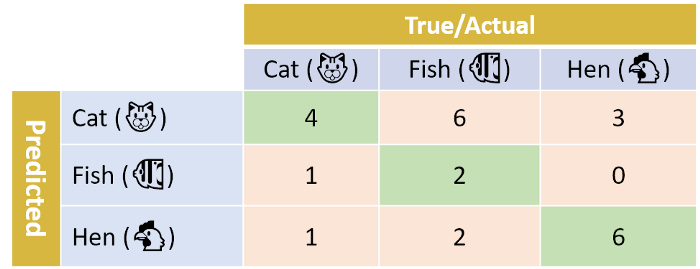

이 그림이다.
25개의 데이터는 고양이와 물고기, 그리고 닭의 세 개의 클래스 중 하나에 속한다.
우리의 모델은 이 데이터에 대해 예측을 수행하는데, 그러면 위와 같은 $3\times3$ confusion matrix를 얻을 수 있다.

이 confusion matrix는 이진분류때처럼 TP, TN, FP, FN와 같이 나눌 수 없다.
하지만 이진분류에서 네 개의 셀을 PP, NN, NP, PN 으로도 나눌 수 있다는 점을 생각해보면, 위 그림의 아홉 개 셀은 CC, CP, CH, FC, FF, FH, HC, HF, HH로 나눌 수는 있을 것 같다.
그리고, 가끔은 이것을 다음처럼 정말로 행렬처럼 표현하는 게 유용할 수도 있을 것 같다.

$$A=\begin{bmatrix}
a_{11}&a_{12}&a_{13}\\
a_{21}&a_{22}&a_{23}\\
a_{31}&a_{32}&a_{33}
\end{bmatrix}$$

## 2.1. accuracy

accuracy는 이진분류에서 사용했지만, 다중분류에서도 당연히 사용할 수 있다.
정확히 맞춘 경우들은 4+2+6이니까, 12개이다.
이것을 TC+TF+TH=12 라고도 표현할 수 있겠고 CC+FF+HH=12 라고 표현할 수도 있겠다.
선형대수 방식으로 표현하면 $\text{trace}(A)=12$라고 해도 될 것이다.

$$\text{accuracy} = \frac{12}{25}=0.48$$

한편 이 값을 어떤 의미에서는 micro-metric이라고도 한다.
정확하게는, micro-precision, micro-recall, micro-f1-score는 accuracy의 값을 가리킨다.
즉
$$\text{micro-precision}=\text{micro-recall}=\text{micro-f1-score}=\text{accuracy}$$
이다.
이에 관해서는 [그 다음 글](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1)에 잘 설명되어 있다.

## 2.2. macro metrics

지금 multiclass classification을 다루고 있기는 하지만, binary classification에서 썼던 metric들을 가져와서 생각해볼 수도 있다.
가령, C(cat, 고양이)에 대해서만 생각해본다면, 그러니까 cat과 non-cat으로 이진분류를 하는 거라면, 다음과 같은 $2\times2$ 행렬을 생각할 수 있다.

|       |cat|non-cat|
|:-:    |:-:|:-:|
|cat    |4  |9|
|non-cat|2  |10|

마찬가지로, F(fish, 물고기)와 H(hen, 수탉)을 가지고도 confusion matrix를 만들면

|        |fish|non-fish|
|:-:     |:-:|:-:|
|fish    |2  |1|
|non-fish|8  |14|

|       |hen|non-hen|
|:-:    |:-:|:-:|
|hen    |6  |3|
|non-hen|3  |13|

이 된다.
각각의 경우에 precision, recall, f1-score를 계산하면

\begin{align*}
&\text{precision(cat)}=\frac4{13}&&
\text{recall(cat)}=\frac46&&
\text{f1-score(cat)}=\frac8{19}\\
&\text{precision(fish)}=\frac23&&
\text{recall(fish)}=\frac2{10}&&
\text{f1-score(fish)}=\frac4{13}\\
&\text{precision(hen)}=\frac69&&
\text{recall(hen)}=\frac69&&
\text{f1-score(hen)}=\frac23
\end{align*}

이다.
즉, 각 class별로, 세 개의 metric인 precision, recall, f1-score가 존재한다.
이 아홉 개의 값이 각각 나름대로 의미는 있겠지만, 이것들은 하나의 class를 기준으로만 판단하는 값이다.
각각의 class가 아닌 우리가 생각하는 특정한 모델이 전체적으로 얼마나 잘 작동하는가를 측정하는 metric 본래의 의미를 반영하지는 못한다.
그래서, 세 class에 대하여 각각 (산술) 평균을 내면 그러한 의미를 대략적으로 파악할 수 있다.
이것을 각각 macro precision, macro recall, macro f1-score라고 한다.

\begin{align*}
&\text{macro-precision} &&=\frac{\frac4{13}+\frac23+\frac69}3,\qquad
\text{macro-recall}     &&=\frac{\frac46+\frac2{10}+\frac69}3,\qquad
\text{macro-f1-score}   &&=\frac{\frac8{21}+\frac4{13}+\frac23}3\\
&&&=\frac{64}{117}      &&=\frac{23}{45}  &&=\frac{1034}{2223}\\
&&&=0.5470              &&=0.5111         &&=0.4651
\end{align*}

## 2.3. weighted metrics

위에서 macro metric들을 정의할 때에, 각 class별 metric에 평균을 취하였다.
그런데 무슨 평균을 취했냐 하면, 단순히 산술평균을 취했다.
평균에는 여러가지 평균이 있는데 굳이 산술평균을 취했다.

물론, 이 경우에는 F1-score를 계산할 때처럼 조화평균을 계산할 당위가 전혀 없다.
F1-score에서는 분모는 서로 다르고 분자가 일정했기에, 역수의 산술평균으로서의 평균인 조화평균을 생각하는 게 자연스러웠는데, 여기서는 그래야 할 필요가 없다.
그래서 그냥 가장 대표적인 평균으로서, 산술평균을 취한 것이다.

흔히 평균이라고 하면, 산술평균, 기하평균, 조화평균, RMS(root mean square) 등으로 다양한데, 그 중에서는 가중치를 고려한 평균 (weighted average)이라는 것도 있다.
변량 $x_1,\cdots,x_n$이 주어져 있을 때, 각각의 변량에 가중치 $w_1,\cdots,w_n$을 주어 평균을 내는 것이다.
이때, (1) $w_1+\cdots+w_n=1$과 (2) $w_i\ge0$ $(i=1,\cdots,n)$의 조건까지도 부여하는 것이 보통이다.
(1)과 (2)가 없으면 weighted sum이라고 하고, (!)이 있으면 weighted average라고 한다.
그런데 보통은 (1)과 (2)가 모두 있는 경우를 고려한다.

(1)과 (2)의 조건을 반영한 weighted average의 대표적인 예시로는, 두 점의 내분점을 구하는 공식이다.
(2)의 조건을 없애면, 외분점을 구하는 공식이 된다.
한편, softmax함수도 (1)과 (2)를 반영한 weighted average라고 말할 수 있다.
또한, (1차원이건 2차원이건 3차원이건) 어떤 물체의 무게중심을 구할 때에도, (1)과 (2)를 반영한 weighted average를 생각하게 된다.
이때, 물체가 끊어져 있지 않고 (discrete하지 않고) 연속적이면 (continuous)하면, 덧셈 대신 적분이 들어갈 것이다.
신경망(neural network)에서 가중치들이 반영되는 사례는, (1)과 (2)가 반영될 필요 없는 weighted sum을 말할 것이다.

여기에서는 precision(cat), precision(fish), precision(hen)의 평균을 낼 때에, cat, fish, hen의 상대 도수 (각 class의 경우의 수 6, 10, 9를 전체 경우의 수 25로 나눈 것)를 weight으로 하여 weighted average를 낸다.

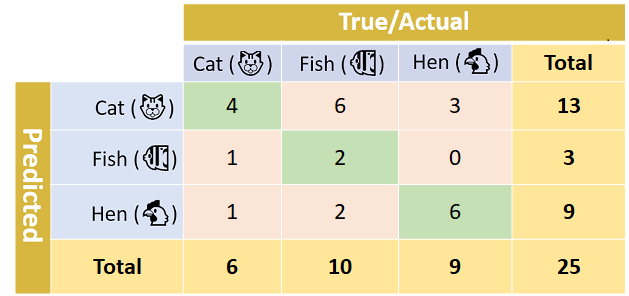

따라서 다음처럼 계산하면 될 것이다.

\begin{align*}
\text{weighted-precision}
&=\frac{6}{25}\times\text{precision(cat)}
+\frac{10}{25}\times\text{precision(fish)}
+\frac{9}{25}\times\text{precision(hen)}\\
&=\frac{6}{25}\times\frac4{13}
+\frac{10}{25}\times\frac23
+\frac{9}{25}\times\frac69\\
&=\frac{566}{975}\\
&=0.5805\\
\text{weighted-recall}
&=\frac{6}{25}\times\text{recall(cat)}
+\frac{10}{25}\times\text{recall(fish)}
+\frac{9}{25}\times\text{recall(hen)}\\
&=\frac{6}{25}\times\frac46
+\frac{10}{25}\times\frac2{10}
+\frac{9}{25}\times\frac69\\
&=\frac{12}{25}\\
&=0.4800\\
\text{weighted-f1-score}
&=\frac{6}{25}\times\text{f1-score(cat)}
+\frac{10}{25}\times\text{f1-score(fish)}
+\frac{9}{25}\times\text{f1-score(hen)}\\
&=\frac{6}{25}\times\frac8{19}
+\frac{10}{25}\times\frac4{13}
+\frac{9}{25}\times\frac23\\
&=\frac{2866}{6175}\\
&=0.4641
\end{align*}

macro-precision은 macro-precision(cat), macro-precision(fish), macro-precision(hen)을 단순히 산술평균하여 계산했었다.
다시 말해, 세 값에 같은 weight$(=\frac13)$을 주어서 weighted average를 계산한 셈이다.
그런데 weighted-precision은, 실제 각 class의 값들이 각각 얼마나 많이 있는지를 고려하여 평균을 낸 것이다.
따라서 weighted-precision은 macro-precision보다 더 의미있는 값을 가진다고 말할 수 있다.
마찬가지로 weighted-recall과 weighted-f1-score도 macro-recall과 macro-f1-score보다 더 정교한 값을 나타낸다고 말할 수 있을 것 같다.

## 2.4. Cohen's kappa

> Cohen’s kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. ([wikipedia](https://en.wikipedia.org/wiki/Cohen%27s_kappa))

Cohen's kappa에 대해서는 [마지막 글](https://towardsdatascience.com/multi-class-metrics-made-simple-the-kappa-score-aka-cohens-kappa-coefficient-bdea137af09c)과 [또 좋은 글](https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd)에서 가장 많이 참조했다.

### 2.4.1. Cohen's kappa에 대한 대략적인 설명
지금까지 multiclass classification에서 여러 개의 evaluation metric들을 나열해 보았다.
가장 먼저, accuracy(2.1.)는  모델의 성능을 평가하는 데 있어서의 가장 기본적인 evluation metric이었다.
그런데 confusion matrix의 분포가 균일하지 않고 한쪽에 몰려있으면, accuracy는 큰 의미가 없을 수도 있다고 했다.
binary classification에서 FP와 FN을 잘 반영할 수 있는 지표로서 각각 precision과 recall이 있었는데, multiclass classification에서는, n class classification을 n개의 class 각각에 대한 precision과 recall을 생각할 수 있었다.
macro-precision, macro-recall, macro-f1-score는 각각, n개의 precision / recall / f1-score를 단순히 산술평균하여 계산한 값이었다.
또한, weigthed 버전도 있었는데, 이것은 n개의 precision / recall, f1-score를 상대도수에 의한 가중치를 고려하여 평균을 낸 값이었다.
이것들은 `sklearn`에서 `classification_report`을 사용하면 바로 출력되는 값들이기도 하다.

이것들 말고 완전히 새로운 종류의 evaluation metric이 있다.
**Cohen's Kappa**라고 불리는 이것은 $\kappa$라고 적는 evaluation metric인데, 기본적으로 agree $(p_0)$ 값이 커질수록 커지는 값이다.
이때 agree 값은 2.1에서 언급한 accuracy와 정확히 일치하는 값이다.
$p_0$에 정비례하지는 않고 (즉, 선형함수인 것은 아니고) $p_0$에 대한 affine map이다.
agree 말고, 또하나 고려하는 값은 chance agree라고 불리우는 $p_e$이다.
정확한 설명은 조금 더 있다가 하겠지만 $p_e$에 대한 설명은 대략적으로 다음과 같이 할 수 있다.
$p_0$는 'actual class와 predicted class가 실제로 일치하는 비율'이라고 이해할 수 있을 것인데, 반면에 
$p_e$는, 'actual class와 predicted class가 우연히 일치하는 비율'이다.
이러한 $p_0$와 $p_e$를 가지고 Cohen's kappa를 다음과 같이 계산한다.

$$\kappa = \frac{p_0-p_e}{1-p_e}=1-\frac{1-p_0}{1-p_e}$$

 - $p_e$는 0과 1 사이의 값이니 분모 또한 0과 1 사이의 값이다.
하지만 분자는 꼭 양수일 필요는 없다.
 - $p_0$가 커질수록 ($p_e$의 값에 상관없이) $\kappa$도 커진다.
 하지만, $p_e$가 커지면, ($p_0$의 값이 일정하면) $\kappa$는 작아진다.
 - 그런 의미에서 $\kappa$의 upper bound는 존재한다 ; $p_0$가 1이면 $p_e$의 값에 상관없이 $\kappa=1$이 된다.
 - 하지만 $\kappa$의 lower bound는 존재하지 않는다. (? https://www.hindawi.com/journals/jps/2015/751803/)
 - $\kappa$의 값은 양수일 수도 있고, 음수일 수도 있다.
 $\kappa$가 양수일 조건에 관해서는 2.4.5에 계산을 해보았다.

### 2.4.2. accuracy/precision - vaild/reliable - bias/variance - intra/inter reliability
대학교 1학년때, 일반물리 시간에 "[정확도(accuracy)"와 "정밀도(precision)](https://ko.wikipedia.org/wiki/%EC%A0%95%ED%99%95%EB%8F%84%EC%99%80_%EC%A0%95%EB%B0%80%EB%8F%84)"에 대해 배운 적이 있다.
어떤 대상 A를 어떤 측정도구 a로 측정할 때, 측정도구 a가 대상 A를 실제값에 가깝게 측정하면 정확도가 높다고 말한다.
실제값과 다르게 측정하면 정확도가 낮다고 한다.
많은 경우에 정확도를 측정하는 데에는 MSE 혹은 RMSE를 고려한다.
한편, 측정도구 a가 측정대상 A를 일관적으로 측정하는가 하는 것도 중요한 문제가 될 수 있다.
한 개의 측정도구 a가 측정대상 A를 여러 번 측정했을 때, 그 측정값이 균일하게 분포하면 정밀도가 높다고 말하고, 그렇지 않으면 정밀도가 낮다고 말한다.
당연히, 정밀도는 측정값들의 산포도로서 정의하면 적절할 것이다.
이 문맥에서의 정확도(accuracy)는 지금까지 계속 말해왔던 accuracy와 일맥상통한다.
하지만 정밀도(precision)은 지금까지 말해왔던 precision과 완전히 다른 말이다.

정확도(accuracy)와 정밀도(precision)를 설명할 때에는 가끔 validity / reliabilty라는 단어로 설명하기도 하는 것 같다.
조금 더 정확하게는 정확도(accuracy)와 정밀도(precision)는 측정도구로 어떤 대상을 측정할 때에 쓰는 말이지만, validity와 reliability는 어떤 현상을 설명하기 위한 model 혹은 test에 대한 말인 것 같다.
([또 다른 글](https://towardsdatascience.com/cohens-kappa-9786ceceab58))에 나온 아래 그림을 보면 정확히 이해할 수 있다.
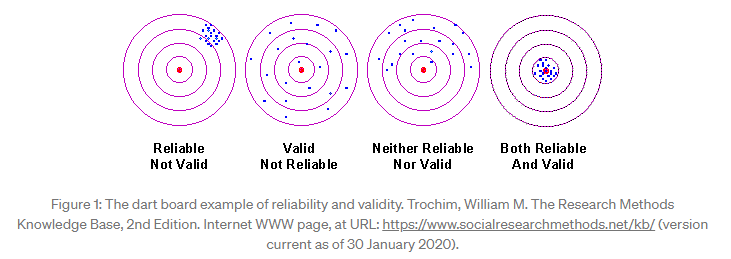

이 그림은 마치, overfitting을 설명할 때 나오는 bias-variance tradeoff를 보는 듯하다.
물론 bias-variance tradeoff와 비슷한 문맥이라고 이해해도 될 것 같다.

[또 다른 글](https://towardsdatascience.com/cohens-kappa-9786ceceab58)에서는 reliability도 두가지로 분류하고 있다.
intra-rater reliabilty와 inter-rater reliability가 그것들이다.
이 글에서의 설명을 그대로 인용하면

>For the results of an experiment to be useful, the observers of the test would have to agree on its interpretation, or else subjective interpretation by the observer can come into play therefore good reliability is important. However, reliability can be broken down into different types, Intra-rater reliability and Inter-rater reliability.
>
>Intra-rater reliability is related to the degree of agreement between different measurements done by the same person.
>
>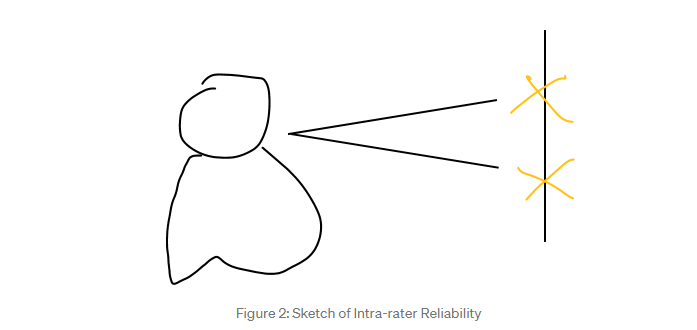
>
>Inter-rater reliability is related to the degree of agreement between two or more raters.
>
>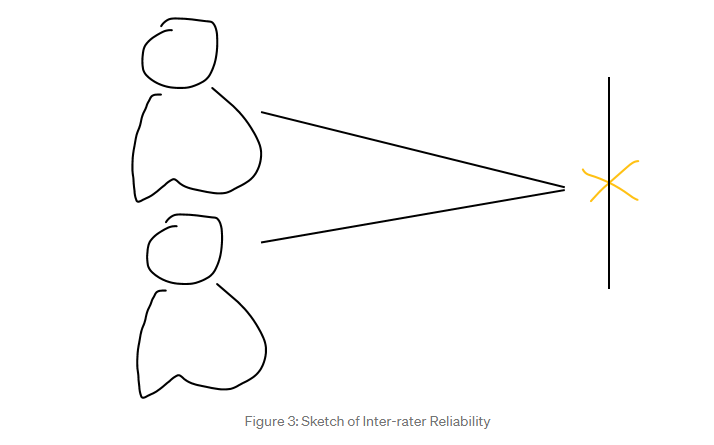

이렇게 길게 여러 개념들에 대해서 이야기한 것은 Cohen's kappa의 식에 등장하는 값 chance agree $p_e$가 inter-rater reliability에 해당하는 값이라는 것을 말하기 위해서이다.
조금 덜 엄밀하게 말하면 다음과 같이 요약할 수 있을 것 같다.
 - $p_0$는 정확도(accuracy)와 관련이 있는 반면, $p_e$는 정밀도(precision)와 관련이 있다.
 - $p_0$는 해당 모델이 얼마나 valid한지를, $p_e$는 해당 모델이 얼마나 reliable한지를 말한다.
    - 그리고 이 때의 reliabity는, 정확하게 말하면 inter-rater reliabilty를 말한다.
    - Cohen's kappa에서 rater란 두 명의 (두 개의) rater를 말하는데, actual class와 predicted class를 각각 말한다.

### 2.4.3. agreement($p_0$)와 chance agree ($p_e$)
agreement란, accuracy를 말한다.
따라서, 이에 대해서는 더이상 말할 것이 없다.
그냥 2.1에서 언급한 accuracy와 일치하기 때문이다.
반면, change agree $p_e$에 대해서는 설명이 좀 필요하다.

지금 우리가 계속 고려하고 있던 문제는 다음과 같은 그림 상황이다.

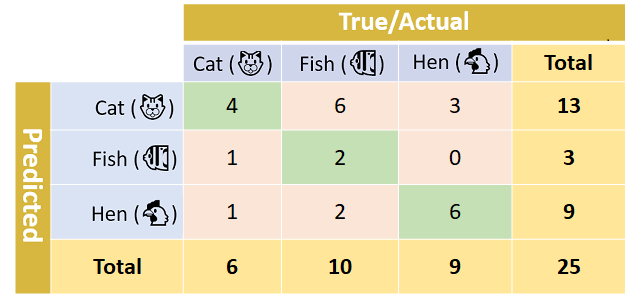

**change agree $p_e$는 predicted class와 actual class가 서로 우연히 일치할 확률을 말한다.**

(적어도 고등학교 수학에서) 확률은, 크게 수학적 확률과 통계적 확률, 그리고 기하학적 확률로 나뉜다.
기하학적 확률은 수학적 확률에서 measure만 다르게 쓴 것이라고 보면 되므로, 그냥 수학적 확률과 통계적 확률로 나누는 것이 맞을 것이다.
지금 고려하는 것은 수학적 확률이 아닌 통계적 확률이다.
그러니까, 전체 도수에서 해당되는 사건의 도수의 비율을 나타낸 값이다.

25개의 케이스들 중 predicted class와 actual class가 실제로 일치하는 비율은, 그냥 accuracy를 가리킨다.
그러니까

$$p_0 = \frac{12}{25}=0.48$$

이다.
한편, 'predicted class가 cat일 확률', 'predicted class가 fish일 확률', 'predicted class가 hen일 확률'도 계산할 수 있는데, 각각

$$
P(\text{pred, cat})   =\frac{13}{25},\qquad
P(\text{pred, fish})  =\frac3{25},\qquad
P(\text{pred, hen})   =\frac9{25}
$$

이다.
또한 'actual class가 cat일 확률', 'actual class가 fish일 확률', 'actual class가 hen일 확률'은 각각

$$
P(\text{actual, cat})   =\frac6{25},\qquad
P(\text{actual, fish})  =\frac{10}{25},\qquad
P(\text{actual, hen})   =\frac9{25}
$$

이다.
그러니, '통계적으로' predicted class와 actual class가 서로 **우연히** 일치할 확률은 다음과 같이 계산할 수 있을 것이다.

\begin{align*}
p_e&=P(\text{predicted = actual})\\
&=P(\text{predicted = cat})\times P(\text{actual = cat})
+ P(\text{predicted = fish})\times P(\text{actual = fish})
+ P(\text{predicted = hen})\times P(\text{actual = hen})\\
&=\frac{13}{25}\times\frac6{25}+\frac3{25}\times\frac{10}{25}+\frac9{25}\times\frac9{25}\\
&=\frac{78+30+81}{625}\\
&=\frac{189}{625}\\
&=0.3024
\end{align*}

### 2.4.4. Cohen's kappa의 계산

이미 Cohen's kappa에 대해 계산식에 대해 언급했지만, 다시 식을 적고 또 값을 계산하면 다음과 같이 된다.

$$
\kappa = \frac{p_0-p_e}{1-p_e}=\frac{0.48-0.3024}{1-0.3024} = 0.2546
$$

Cohen's kappa는 그 값이 1에 가까워질수록 actual class와 predicted class가 비슷하다고 말할 수 있다.
만약 Cohen's kappa가 0이면, '실제로 actual class와 predicted class가 서로 일치할 확률'과 '우연히 actual class와 predicted class가 서로 일치할 확률'이 서로 같다는 뜻이다.
Cohen kappa의 값은 음수가 될 수도 있는데, 이 경우, '실제로 actual class와 predicted clas가 서로 일치할 확률'이 '우연히 actual class와 predicted class가 서로 일치할 확률'보다도 적은 것이다.
아래는 다음 [출처](https://www.statisticshowto.com/cohens-kappa-statistic/)에서 가져왔다.
>The Kappa statistic varies from 0 to 1, where.
>
> - 0 = agreement equivalent to chance.
> - 0.1 – 0.20 = slight agreement.
> - 0.21 – 0.40 = fair agreement.
> - 0.41 – 0.60 = moderate agreement.
> - 0.61 – 0.80 = substantial agreement.
> - 0.81 – 0.99 = near perfect agreement
> - 1 = perfect agreement.


### 2.4.5. $p_e<p_0$일 조건에 대한 계산
 
 어디 언급된 것은 아니고, 그냥 계산을 해봤는데 신기해보여서 적어보았다.
 이것을 cayley hamilton 정리와 연관시켜보려 했는데, 연관시키는 건, 일반적으로 안될 것 같다.
 정확히 말하면, $n=2$일 때는 cayley hamilton 정리와 연관시킬 수 있을 것 같은데 $n\ge3$인 경우는 그렇게 말할 수가 없다.

 multiclass classification of n classes의 confusion matrix를 $A=(a_{ij})_{n\times n}$이라고 쓰면, $p_0$의 값은
 
 $$p_0 = \frac{\sum_{k=1}^na_{kk}}{\sum_{i=1}^n\sum_{j=1}^na_{ij}}$$
 
 이다.
 i, j, k의 범위는 다 일정하므로 그냥
 
 $$p_0 = \frac{\sum_ka_{kk}}{\sum_{i,j}a_{ij}}=\frac{\text{trace}(A)}{\sum_{i,j}a_{ij}}$$
 
 라고 써도 될 것이다.
 또한 $p_e$의 값은 다음과 같이 계산된다.
 
 \begin{align*}
 p_e & = \frac{\sum_i a_{i1}}{\sum_{i,j}a_{ij}}\times\frac{\sum_j a_{1j}}{\sum_{i,j}a_{ij}}
 +\cdots+
 \frac{\sum_i a_{in}}{\sum_{i,j}a_{ij}}\times\frac{\sum_j a_{nj}}{\sum_{i,j}a_{ij}}\\
 & = \sum_k \frac{\sum_i a_{ik}\times \sum_j a_{kj}}{\left(\sum_{i,j}a_{ij}\right)^2}\\
 & = \frac{\sum_{i,j}\left(\sum_k a_{ik}\times a_{kj}\right)}{\left(\sum_{i,j}a_{ij}\right)^2}\\
 & = \frac{\sum_{i,j}\left(A^2\right)_{i,j}}{\left(\sum_{i,j}a_{ij}\right)^2}
 \end{align*}
 
 그러므로
 \begin{align*}
 p_e < p_0 
 &\iff \frac{\sum_{i,j}\left(A^2\right)_{i,j}}{\left(\sum_{i,j}a_{ij}\right)^2} < \frac{\text{trace}(A)}{\sum_{i,j}a_{ij}}\\
 &\iff \sum_{i,j}\left(A^2\right)_{i,j} - \text{trace}(A)\times \left(\sum_{i,j}a_{ij}\right) < 0\\
 &\iff \sum_{i,j}\left(A^2-\text{trace}(A)\times A\right)<0\\
 &\iff \sum_{i,j}-\text{det}(A)\times I<0
 \end{align*}
 이다.
 만약, $n=2$이면 cayley hamilton 정리에 의해
 \begin{align*}
 &\iff n\times \det(A)>0\\
 &\iff \det(A)>0
 \end{align*}
 이다.
 이것이 의미가 있는 결과인지는 잘 모르겠다.

산책을 다녀왔다.
추석에 음식도 많이 먹었는데, 귀경하고 나서 치킨을 먹었더니 몸이 너무 무거웠고, 한두시간 걷고 왔다.

저 위의 식에 대해서도 잠깐 생각했는데 다음과 같이 정리할 수 있겠다.

위의 첫번째식은 유효하다.
그리고 두번째 식의 $p_e > p_0$를 계산하는 과정에서 세번째 줄까지는 일반적으로 성립하는 식이다.
하지만 네번째 식은 $n=2$일 때의 cayley hamilton 정리를 쓴 것이므로 일반적으로는 성립하지 않는다.

여하튼, $n=2$이면 위의 계산들이 모두 성립한다. $A=\begin{bmatrix}a&b\\c&d\end{bmatrix}$이면 $p_e>p_0$이기 위한 필요충분조건은 ad-bc>0이다.
이걸 다시 계산해보자.
(사실 생각해보면, $n=2$이면 저렇게 거창하게 $\Sigma$를 쓸 필요는 없었다.)
binary classification에 관한 confusion matrix $A$가

$$A=\begin{bmatrix}a&b\\c&d\end{bmatrix}$$

라고 가정하면 $p_0$의 값은

$$p_0 = \frac{a+d}{a+b+c+d}$$

이다.
$p_e$의 값은

\begin{align*}
p_e
& = \frac{a+b}{a+b+c+d}\times\frac{a+c}{a+b+c+d} + \frac{c+d}{a+b+c+d}\times\frac{b+d}{a+b+c+d}\\
& = \frac{(a+b)(a+c)+(c+d)(b+d)}{(a+b+c+d)^2}
\end{align*}

이다.
따라서

\begin{align*}
p_e > p_0 
&\iff \frac{a+d}{a+b+c+d} > \frac{(a+b)(a+c)+(c+d)(b+d)}{(a+b+c+d)^2}\\
&\iff (a+d)(a+b+c+d) > (a+b)(a+c)+(c+d)(b+d)\\
&\iff a^2+ab+ac+ad+ad+bd+cd+d^2 > a^2+ac+ab+bc + bc+cd+bd+d^2\\
&\iff 2(ad-bc) > 0\\
&\iff ad-bc >0
\end{align*}
 
이다.
예상한 대로 나왔다.
(두번째 줄에 좌변도 여덟 개 항, 우변도 여덟 개 항이 나타나는 것이 보인다.
잘 계산되었다는 증거인 것 같다.)

이차 정사각행렬에서 행렬식이 양수라는 건 뭘 뜻하더라.
positive definite이라는 걸 뜻하지는 않는다.
그건 더 강한 조건이다.
기하학 개론에서 배운 바에 따르면, 표준단위벡터 $e_1$, $e_2$가 이 행렬에 의해 사상되는 두 벡터 $\begin{bmatrix}a\\c\end{bmatrix}$, $\begin{bmatrix}b\\d\end{bmatrix}$가 형성하는 평행사변형의 넓이와 관련이 있다.
이때의 넓이라 함은, signed area를 뜻한다.
그걸 또 다시 말하면, 두 벡터가 positive oriented 되어있다는 걸 뜻한다.
하지만, 여기서는 그게 중요한 것 같지는 않다.

다시 해석하면 다음과 같다.
binary classification에서
confusion matrix라는 건 아래와 같이 생긴 표를 뜻했었다.

||True|False|
|:-:|:-:|:-:|
|True |TP|FP|
|False|FN|TN|

accuracy가 0.5를 넘긴다는 뜻은, TP와 TN의 *산술평균*이 FP와 FN의 산술평균보다 크다는 것을 뜻한다.
한편, cohen kappa가 0을 넘긴다는 뜻은, TP와 TN의 *기하평균*이 FP와 FN의 기하평균보다 크다는 것을 뜻한다.

\begin{align*}
\text{accuracy}>0.5
&\iff\frac{\text{TP}+\text{TN}}{\text{TP}+\text{FP}+\text{FN}+\text{TN}}>0.5\\
&\iff\text{TP}+\text{TN}>\text{FP}+\text{FN}\\
&\iff\frac{\text{TP}+\text{TN}}2>\frac{\text{FP}+\text{FN}}2
\end{align*}

\begin{align*}
\text{Cohen's kappa}>0
&\iff\frac{TP+TN}{TP+FP+FN+TN} > \frac{(TP+FP)(TP+FN)+(FN+TN)(FP+TN)}{(TP+FP+FN+TN)^2}\\
&\iff\text{TP}\times \text{TN}-\text{FP}\times\text{FN} >0\\
&\iff\sqrt{\text{TP}\times\text{TN}}>\sqrt{\text{FP}\times\text{FN}}
\end{align*}

### 2.4.6. Cohen's kappa 요약
나름대로 열심히 썼는데, 쓰고보니 정리가 잘 안되어 있다.
중요한 것만 정리하여 적어보자.
 - Cohen's kappa를 구성하는 두 개의 값이 있다.
    - 하나는 agree ($p_0$)라는 값으로서, '실제로 actual class와 predicted class이 같을 통계적 확률'을 뜻한다.
    - 이것은 기존에 정의했었던 accuracy와 정확히 같다.
    - validity로서의 의미이다.
    - 나머지 하나는 chance agree($p_e$)라는 값으로서, '평균적으로, 우연히 actual class와 predicted class가 같을 확률'을 뜻한다.
    - reliability로서의 의미이다.
    정확하게는, inter-rater reliability의 의미이고 이때 rater는 actual class와 predicted class이다.
 - Cohen's kappa는 다음과 같이 계산한다.
    - $\kappa = \frac{p_0-p_e}{1-p_e}=1-\frac{1-p_0}{1-p_e}$
    - $\kappa$의 최댓값은 1이고, $p_0=1$일 때에 최댓값이 된다.
    - $\kappa$가 0보다 크면, actual class와 predicted class가 임의의 관계에 있는 것이 아니라, 서로 연관관계에 있음을 나타낸다.
    - binary classification에서 $\kappa>0$이기 위한 필요충분조건은 $\text{TP}\times\text{TN}>\text{FP}\times\text{FN}$인 것이다.
 - Cohen's kappa를 사용하는 의의는 다음과 같다.
    - multiclass classification의 성능을 표시하는 '단일한' 지표이다.
    다른 지표들이, 한 class에 대해서의 지표를 나타내야 했었던 것과는 다르다.
    - 정확도(accuracy, validity) 말고도 정밀도(precision, reliabilty)에 해당하는 요소를 집어넣어 그 의미를 더했다.
    - 조금 더 정확한 의의는, 아래의 발췌문을 통해 보는 게 더 신빙성있을 듯하다.
    아래 문장의 출처는 [위키피디아](https://en.wikipedia.org/wiki/Cohen%27s_kappa)이다.

> Cohen’s kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance.



# 3. codes with `sklearn`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, cohen_kappa_score, ConfusionMatrixDisplay

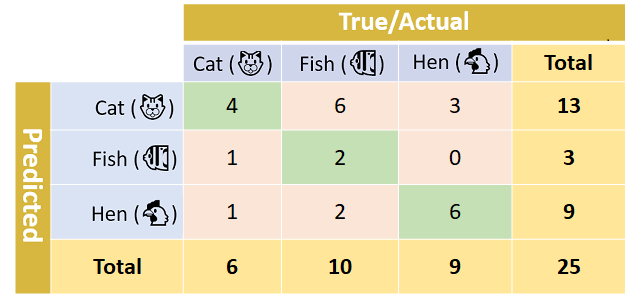

In [3]:
# data
c = 'cat'
f = 'fish'
h = 'hen'
actual    = np.array([c,c,c,c,c,c,f,f,f,f,f,f,f,f,f,f,h,h,h,h,h,h,h,h,h])
predicted = np.array([c,c,c,c,f,h,c,c,c,c,c,c,f,f,h,h,c,c,c,h,h,h,h,h,h])

In [4]:
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

         cat       0.31      0.67      0.42         6
        fish       0.67      0.20      0.31        10
         hen       0.67      0.67      0.67         9

    accuracy                           0.48        25
   macro avg       0.55      0.51      0.47        25
weighted avg       0.58      0.48      0.46        25



In [5]:
confusion_matrix(actual,predicted)

array([[4, 1, 1],
       [6, 2, 2],
       [3, 0, 6]])

In [6]:
cohen_kappa_score(actual,predicted)

0.2545871559633026